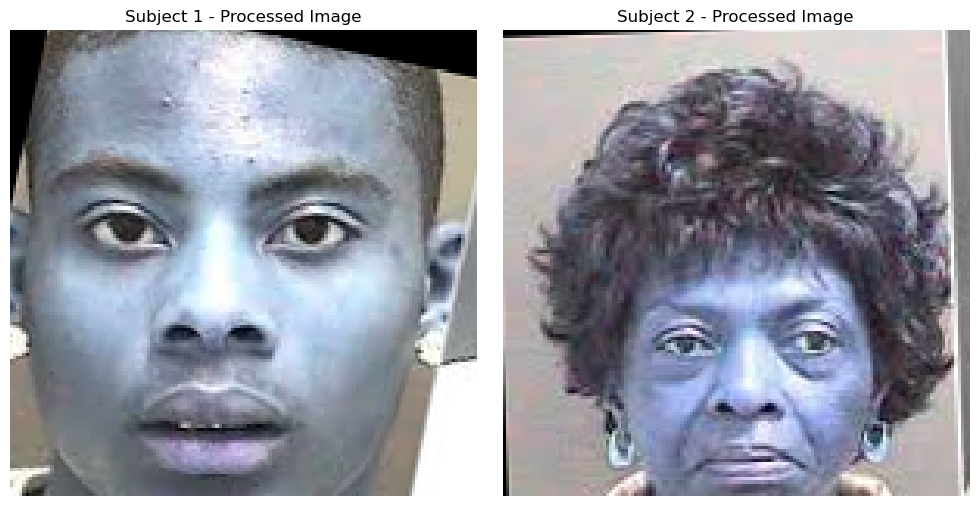

In [12]:
import dlib
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to preprocess and align faces for better recognition
def align_faces(image):
    # Initialize dlib's face detector and facial landmark predictor
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")  # Replace with the path to the shape predictor file

    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces in the grayscale image
    faces = detector(gray)

    aligned_faces = []
    for face in faces:
        # Get the facial landmarks
        landmarks = predictor(gray, face)
        
        # Calculate eye centers
        left_eye = (landmarks.part(36).x, landmarks.part(36).y)
        right_eye = (landmarks.part(45).x, landmarks.part(45).y)
        eyes_center = ((left_eye[0] + right_eye[0]) // 2, (left_eye[1] + right_eye[1]) // 2)
        
        # Calculate the angle between the eye centers
        dY = right_eye[1] - left_eye[1]
        dX = right_eye[0] - left_eye[0]
        angle = np.degrees(np.arctan2(dY, dX))
        
        # Adjust the angle if the face appears upside down
        if angle > 90:
            angle -= 180  # Rotate in the opposite direction
        
        # Define the desired output size for alignment
        output_size = (150, 150)
        
        # Get the rotation matrix
        M = cv2.getRotationMatrix2D(eyes_center, angle, 1.0)
        
        # Perform the affine transformation for alignment
        aligned_face = cv2.warpAffine(image, M, output_size, flags=cv2.INTER_CUBIC)
        aligned_faces.append(aligned_face)
    
    return aligned_faces

# Replace 'path_to_subject1_image.jpg' and 'path_to_subject2_image.jpg' with actual image paths
subject_1_path = 'subject1.jpeg'
subject_2_path = 'subject2.jpeg'

subject_1_image = cv2.imread(subject_1_path)
subject_2_image = cv2.imread(subject_2_path)

# Process images for subject 1 and subject 2
processed_subject_1 = align_faces(subject_1_image)
processed_subject_2 = align_faces(subject_2_image)

# Display processed images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Subject 1 - Processed Image')
plt.imshow(processed_subject_1[0], cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Subject 2 - Processed Image')
plt.imshow(processed_subject_2[0], cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()